In [1]:
import mock

Connecting daveliu@mesoscale-activity.datajoint.io:3306


In [ ]:
#mock.mockdata()

In [2]:
import datajoint as dj

In [3]:
import ephys

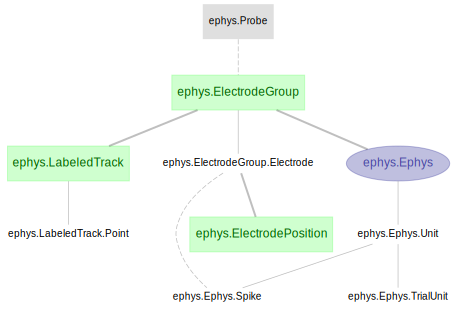

In [4]:
dj.ERD(ephys)

In [5]:
mouse=ephys.experiment.lab.Animal()
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01
397853,2017-08-01
399752,2017-08-01


In [6]:
h2o=ephys.experiment.lab.AnimalWaterRestriction()
h2o

animal Janelia ANM ID (6 digits),water_restriction water restriction number
123456,tw5
397853,dl14
399752,dl7


In [7]:
person=ephys.experiment.lab.Person()
person

username,fullname
daveliu,Dave Liu


In [8]:
rig=ephys.experiment.lab.Rig()
rig

rig,rig_description
EPhys1,Ephys rig 1
RRig,Recording rig
TRig1,Training rig 1
TRig2,Training rig 2
TRig3,Training rig 3


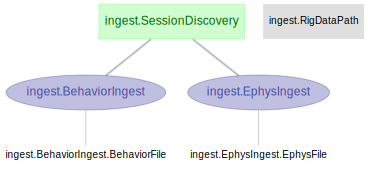

In [9]:
import ingest
dj.ERD(ingest)

In [2]:
import mapshell

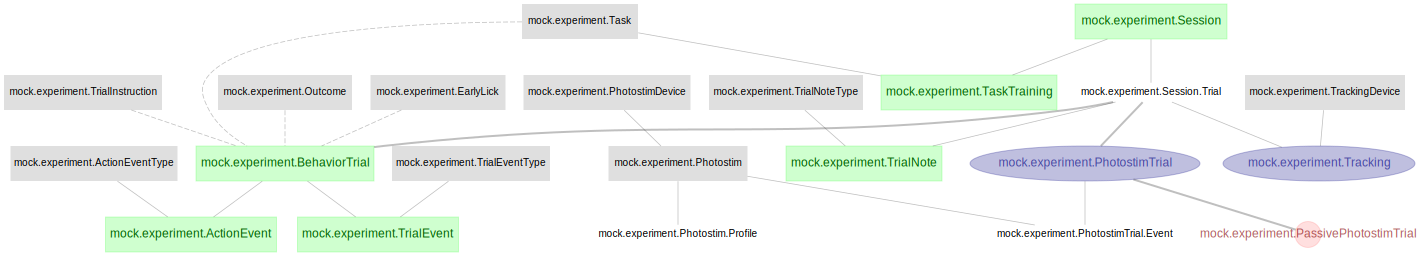

In [11]:
dj.ERD(ephys.experiment)

In [3]:
mapshell.discover()

b6_TW_autoTrain_20171107_100620.mat skipped - no animal for b6
b6_TW_autoTrain_20171108_095511.mat skipped - no animal for b6
b6_TW_autoTrain_20171109_093437.mat skipped - no animal for b6
b6_TW_autoTrain_20171110_064105.mat skipped - no animal for b6
b6_TW_autoTrain_20171113_095102.mat skipped - no animal for b6
b6_TW_autoTrain_20171114_093558.mat skipped - no animal for b6
b6_TW_autoTrain_20171115_093104.mat skipped - no animal for b6
b6_TW_autoTrain_20171115_093445.mat skipped - no animal for b6
b6_TW_autoTrain_20171116_100944.mat skipped - no animal for b6
b6_TW_autoTrain_20171117_095905.mat skipped - no animal for b6
b67_TW_autoTrain_20171107_091040.mat skipped - no animal for b67
b67_TW_autoTrain_20171109_102128.mat skipped - no animal for b67
b67_TW_autoTrain_20171113_105817.mat skipped - no animal for b67
b67_TW_autoTrain_20171114_104840.mat skipped - no animal for b67
b67_TW_autoTrain_20171114_113832.mat skipped - no animal for b67
b67_TW_autoTrain_20171115_103728.mat skipped 

pt201_TW_autoTrain_20171027_144741.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171030_112315.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171030_112653.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171031_094804.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171101_100137.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171103_095237.mat skipped - no animal for pt201
pt201_TW_autoTrain_20171106_082130.mat skipped - no animal for pt201
t1fixed_TW_autoTrain_20171008_203834.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171008_225455.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171009_204825.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171009_214026.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171014_200527.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171014_202405.mat skipped - no animal for t1fixed
t1fixed_TW_autoTrain_20171014_202957.mat skipped - no animal for t1fixed
t1fixe

tw8_TW_autoTrain_20171216_233530.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171106_205905.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171107_195503.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171107_204539.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171108_193257.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171108_204248.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171109_223414.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171109_233307.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171110_192009.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171111_192938.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171113_212731.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171113_220156.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171113_220404.mat skipped - no animal for tw8
tw8_TW_autoTrain_20171113_222143.mat skipped - no animal for tw8
WR6_TW_autoTrain_20171128_175649.mat skipped - no animal for WR6
WR6_TW_autoTrain_20171128

In [10]:
sessDis=ingest.SessionDiscovery()
sessDis

animal Janelia ANM ID (6 digits),water_restriction water restriction number,session_date discovered date
123456,tw5,2017-09-11
123456,tw5,2017-09-12
123456,tw5,2017-09-13
123456,tw5,2017-09-14
123456,tw5,2017-09-15
123456,tw5,2017-09-18
123456,tw5,2017-09-19


In [4]:
mapshell.populate()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as spio
import numpy as np

In [8]:
trialNote = ephys.experiment.TrialNote()

In [9]:
ephys.experiment.BehaviorTrial()

animal Janelia ANM ID (6 digits),session session number,trial,task task type,trial_instruction,early_lick,outcome
123456,22,75,audio delay,right,no early,miss
123456,22,76,audio delay,right,no early,miss
123456,22,77,audio delay,right,no early,hit
123456,22,78,audio delay,right,no early,hit
123456,22,79,audio delay,right,no early,hit
123456,22,80,audio delay,left,no early,hit
123456,22,81,audio delay,left,no early,hit


In [10]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [18]:
outcome = (behaviorTrial & 'animal = 397853').fetch('outcome', order_by='session')
early_lick = (behaviorTrial  & 'animal = 397853').fetch('early_lick', order_by='session')

In [19]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [20]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [21]:
trial_note = (trialNote & 'animal = 397853').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [22]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Text(0,0.5,'Proportion Correct')

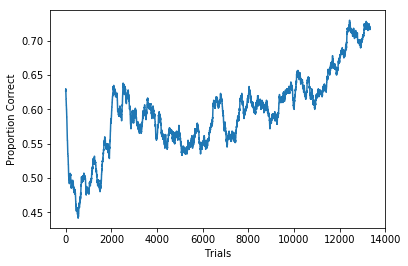

In [24]:
yMA = movingaverage(data,600)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

Text(0,0.5,'Early Licks')

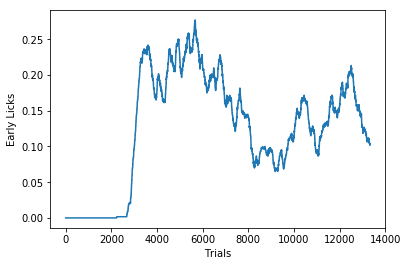

In [25]:
yMA = movingaverage(data1,600)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')